<a href="https://colab.research.google.com/github/smsharma/iaifi-summer-school-tutorials/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
! pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 5.4 MB/s 
     |████████████████████████████████| 419 kB 52.1 MB/s 
     |████████████████████████████████| 596 kB 29.8 MB/s 
     |████████████████████████████████| 141 kB 57.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


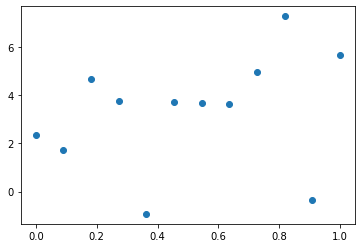

In [222]:
def y(x, m, b):
  y_ary = m * x + b
  std = 3. * np.random.randn(*y_ary.shape)
  y_ary += std * np.random.randn(*y_ary.shape)
  return y_ary, std

n_points = 12

x_ary = np.linspace(0, 1, n_points)
y_ary = y(x_ary, 2., 3.)[0]

plt.scatter(x_ary, y_ary)

In [248]:
from scipy.stats import uniform
from tqdm import tqdm

n_train = 10000

theta_train = uniform.rvs(loc=-5, scale=10, size=(n_train, 2))
y_std_train = np.array([y(x_ary, theta[0], theta[1]) for theta in tqdm(theta_train)])

y_train = y_std_train[:, 0, :]
std_train = y_std_train[:, 1, :]
Cov_train = np.array([np.diag(std ** 2) for std in std_train])

100%|██████████| 10000/10000 [00:00<00:00, 82604.72it/s]


In [249]:
# import torch
# import torch.nn as nn
# import pytorch_lightning as pl
# from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping, StochasticWeightAveraging

# from torch.utils.data import TensorDataset, DataLoader, random_split

In [239]:
# theta_train = torch.Tensor(theta_train)
# y_train = torch.Tensor(y_train)

In [240]:
# batch_size = 64

# val_fraction = 0.1
# n_samples_val = int(val_fraction * len(y_train))

# dataset = TensorDataset(theta_train, y_train)

# dataset_train, dataset_val = random_split(dataset, [len(y_train) - n_samples_val, n_samples_val])
# train_loader = DataLoader(dataset_train, batch_size=batch_size, num_workers=4, pin_memory=True, shuffle=True)
# val_loader = DataLoader(dataset_val, batch_size=batch_size, num_workers=4, pin_memory=True, shuffle=False)


In [241]:
# def build_mlp(input_dim, hidden_dim, output_dim, layers, activation='relu'):
#     """Create a MLP from the configurations
#     """
    
#     activation = nn.ReLU

#     seq = [nn.Linear(input_dim, hidden_dim), activation()]
#     for _ in range(layers):
#         seq += [nn.Linear(hidden_dim, hidden_dim), activation()]
#     seq += [nn.Linear(hidden_dim, output_dim)]

#     return nn.Sequential(*seq)


In [242]:
# class RegressionModel(pl.LightningModule):

#     def __init__(self, optimizer=torch.optim.AdamW, 
#                          optimizer_kwargs={"weight_decay":1e-5}, 
#                          lr=3e-4, 
#                          scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau,
#                          scheduler_kwargs = {"patience":5}):
#         super().__init__()
        
#         self.optimizer = optimizer
#         self.optimizer_kwargs = optimizer_kwargs
#         self.lr = lr
        
#         self.loss = nn.MSELoss()
#         self.mlp = build_mlp(n_points, 128, 2, 3)
        
#     def forward(self, x):
#         return self.mlp(x)
        
#     def configure_optimizers(self):
#         optimizer = self.optimizer(self.parameters(), lr=self.lr, **self.optimizer_kwargs)
        
#         return {"optimizer": optimizer, 
#                 }
            
#     def training_step(self, batch, batch_idx):
#         theta, x = batch
#         theta_out = self(x)     
#         loss = self.loss(theta_out, theta)
#         self.log('train_loss', loss, on_epoch=True)
#         return loss
    
#     def validation_step(self, batch, batch_idx):
#         theta, x = batch
#         theta_out = self(x)     
#         loss = self.loss(theta_out, theta)
#         self.log('val_loss', loss, on_epoch=True)
#         return loss


In [243]:
# model = RegressionModel()

# max_epochs = 20

# lr_monitor = LearningRateMonitor(logging_interval='epoch')

# # Instantiate trainer
# trainer = pl.Trainer(max_epochs=max_epochs, gradient_clip_val=0.5, callbacks=[lr_monitor])
# trainer.fit(model=model, train_dataloaders=train_loader)  

In [244]:
# n_test = 100

# theta_test = uniform.rvs(loc=-5, scale=10, size=(n_test, 2))
# y_test = np.array([y(x_ary, theta[0], theta[1]) for theta in tqdm(theta_test)])

# theta_test = torch.Tensor(theta_test)
# y_test = torch.Tensor(y_test)

In [245]:
# plt.scatter(theta_test[:64][:, 0].detach().numpy(), model(y_test[:64])[:, 0].detach().numpy())

In [246]:
# plt.scatter(theta_test[:64][:, 1].detach().numpy(), model(y_test[:64])[:, 1].detach().numpy())

## Jax

In [ ]:
! pip install flax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 202 kB 4.8 MB/s 
     |████████████████████████████████| 145 kB 52.4 MB/s 
     |████████████████████████████████| 217 kB 50.9 MB/s 
     |████████████████████████████████| 9.1 MB 37.5 MB/s 
     |████████████████████████████████| 51 kB 6.1 MB/s 
     |████████████████████████████████| 72 kB 517 kB/s 


In [ ]:
import jax
from typing import Any, Callable, Sequence
from jax import lax, random, vmap, jit, numpy as jnp
from flax.core import freeze, unfreeze
from flax import linen as nn
from jax.scipy.special import erf, erfc, gammainc, gammaln

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [638]:
def NR(z):
  return jnp.exp(-z ** 2 / 2) / (jnp.sqrt(2 * np.pi)) + z / 2 * (1 + erf(z / jnp.sqrt(2)))

def activation_layers(W, b, x, Cov):

  sigma = jnp.sqrt(W.T @ Cov @ W)
  mu = (W.T @ x + b)
  act = sigma * NR(mu / sigma)
  return act

class DenceUncertainties(nn.Module):
  features: int
  W_init: Callable = nn.initializers.lecun_normal()
  b_init: Callable = nn.initializers.zeros

  @nn.compact
  def __call__(self, x, Cov):

    W = self.param('W', self.W_init, (x.shape[-1], self.features)) 
    b = self.param('b', self.b_init, (self.features,))

    activation_layers_vmapped = vmap(activation_layers, in_axes=(1,0,None,None))
    activation_layers_vmapped_batched = vmap(activation_layers_vmapped, (None,None,0,0))  # vmap along batch dim
    act = activation_layers_vmapped_batched(W, b, x, Cov)
    return act

class Dense(nn.Module):
  features: int
  W_init: Callable = nn.initializers.lecun_normal()
  b_init: Callable = nn.initializers.zeros

  @nn.compact
  def __call__(self, x):

    W = self.param('W', self.W_init, (x.shape[-1], self.features)) 
    b = self.param('b', self.b_init, (self.features,))

    def activation_layers(W, b, x):
      mu = (W.T @ x + b)
      return mu

    activation_layers_batched = vmap(activation_layers, (None,None,0))  # vmap along batch dim
    act = activation_layers_batched(W, b, x)
    return act

In [639]:
class SimpleMLP(nn.Module):
  features: Sequence[int]

  @nn.compact
  def __call__(self, x, Cov):
    x = DenceUncertainties(64, name=f'layers_unc')(x, Cov)
    for i, feat in enumerate(self.features):
      x = Dense(feat, name=f'layers_{i}')(x)
      if i != len(self.features) - 1:
        x = nn.relu(x)
    return x

# # Same as JAX version but using model.apply().
# @jax.jit
# def mse(params, x_batched, y_batched, Cov_batched):
#   # Define the squared loss for a single pair (x,y)
#   def squared_error(x, y, Cov):
#     pred = model.apply(params, x, Cov)
#     return jnp.inner(y-pred, y-pred) / 2.0
#   # Vectorize the previous to compute the average of the loss on all samples.
#   return jnp.mean(jax.vmap(squared_error)(x_batched, y_batched, Cov_batched), axis=0)

# Same as JAX version but using model.apply().
@jax.jit
def mse(params, x_batched, y_batched, Cov_batched):
  # Define the squared loss for a single pair (x,y)
  pred = model.apply(params, x_batched, Cov_batched)
  loss = jnp.mean((y_batched - pred) ** 2 / 2.0)
  return loss


In [640]:
y_train = jnp.array(y_train)
theta_train = jnp.array(theta_train)
Cov_train = jnp.array(Cov_train)

In [641]:
key1, key2 = random.split(random.PRNGKey(0), 2)

model = SimpleMLP(features=[64,64,64,2])
params = model.init(key2, y_train, Cov_train)
y = model.apply(params, y_train, Cov_train)
y.shape

(10000, 2)

In [642]:
# key1, key2 = random.split(random.PRNGKey(0), 2)

# model = SimpleMLP(features=[4,4,4,2])
# params = model.init(key2, y_train)
# y = model.apply(params, y_train)

In [643]:
import optax

learning_rate = 1e-3

tx = optax.sgd(learning_rate=learning_rate)
opt_state = tx.init(params)
loss_grad_fn = jax.value_and_grad(mse)

In [644]:
batch_size = 64

train_ds = tf.data.Dataset.from_tensor_slices((y_train, theta_train, Cov_train))
train_ds = train_ds.cache()
train_ds = train_ds.repeat()
train_ds = train_ds.shuffle(n_train)
train_ds = train_ds.batch(batch_size)
train_ds = iter(tfds.as_numpy(train_ds))

In [645]:
num_epochs = 30

steps_per_epoch = n_train // batch_size

for epoch in range(num_epochs):
  for i_step in range(steps_per_epoch):
    y, theta, Cov = next(train_ds)
    loss_val, grads = loss_grad_fn(params, y, theta, Cov)
    updates, opt_state = tx.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
  print('Loss step {}: '.format(epoch), loss_val)

Loss step 0:  2.4380095
Loss step 1:  1.5180566
Loss step 2:  1.3395538
Loss step 3:  1.00679
Loss step 4:  1.5437574
Loss step 5:  1.270516
Loss step 6:  1.3162409
Loss step 7:  1.1908454
Loss step 8:  1.076488
Loss step 9:  0.989335
Loss step 10:  1.1101497
Loss step 11:  1.1709343
Loss step 12:  1.0378865
Loss step 13:  0.97747487
Loss step 14:  1.4135041
Loss step 15:  0.9138478
Loss step 16:  1.1010258
Loss step 17:  1.0695658
Loss step 18:  1.3084995
Loss step 19:  1.384311
Loss step 20:  1.0280397
Loss step 21:  1.6014283
Loss step 22:  1.3921577
Loss step 23:  1.3539805
Loss step 24:  1.116472
Loss step 25:  1.352215
Loss step 26:  1.3745837
Loss step 27:  1.0809611
Loss step 28:  1.2591331
Loss step 29:  1.3514347


In [646]:
response_test = model.apply(params, y_train, Cov_train)

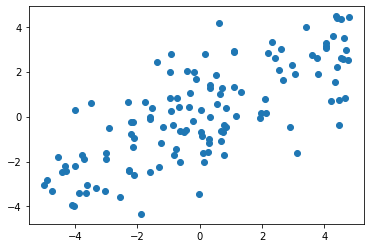

In [647]:
n_plot = 128
plt.scatter(theta_train[:n_plot, 0], response_test[:n_plot, 0])

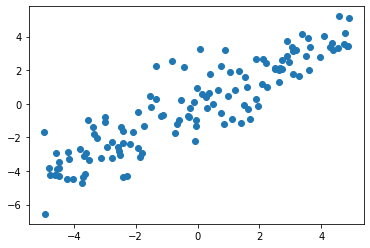

In [648]:
plt.scatter(theta_train[:n_plot, 1], response_test[:n_plot, 1])